In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('births.csv')
dataset.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15547 entries, 0 to 15546
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    15547 non-null  int64  
 1   month   15547 non-null  int64  
 2   day     15067 non-null  float64
 3   gender  15547 non-null  object 
 4   births  15547 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 607.4+ KB


In [6]:
missing_values = dataset.isnull().sum()
print(missing_values)

year        0
month       0
day       480
gender      0
births      0
dtype: int64


In [8]:
missing_percentage = pd.DataFrame(dataset.isnull().sum()*100/dataset.shape[0]).reset_index()
print(missing_percentage)

    index         0
0    year  0.000000
1   month  0.000000
2     day  3.087412
3  gender  0.000000
4  births  0.000000


In [15]:
dataset['decade'] = 10 * (dataset['year'] // 10)
dataset.pivot_table('births', index='decade', columns='gender', aggfunc='sum')

dataset.head()

,year,month,day,gender,births,decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960


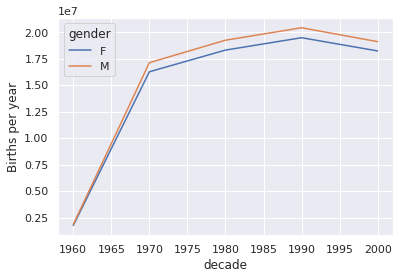

In [16]:
sns.set()
birth_decade = dataset.pivot_table('births', index='decade', columns='gender', aggfunc='sum')
birth_decade.plot()
plt.ylabel("Births per year")
plt.show()

In [22]:
quartiles = np.percentile(dataset['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])

dataset = dataset.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')
dataset['day'] = dataset['day'].astype(int)
dataset.index = pd.to_datetime(10000 * dataset.year +
                              100 * dataset.month +
                              dataset.day, format='%Y%m%d')

dataset['dayofweek'] = dataset.index.dayofweek

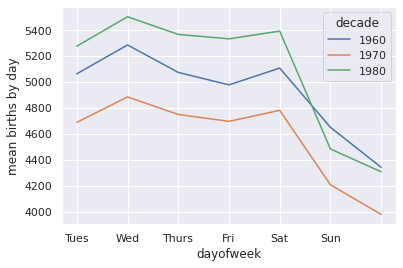

In [23]:
dataset.pivot_table('births', index='dayofweek',
                    columns='decade', aggfunc='mean').plot()
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day');
plt.show()

In [24]:
births_month = dataset.pivot_table('births', [dataset.index.month, dataset.index.day])
print(births_month.head())

births_month.index = [pd.datetime(2012, month, day)
                      for (month, day) in births_month.index]
print(births_month.head())

       births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625
              births
2012-01-01  4009.225
2012-01-02  4247.400
2012-01-03  4500.900
2012-01-04  4571.350
2012-01-05  4603.625


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """


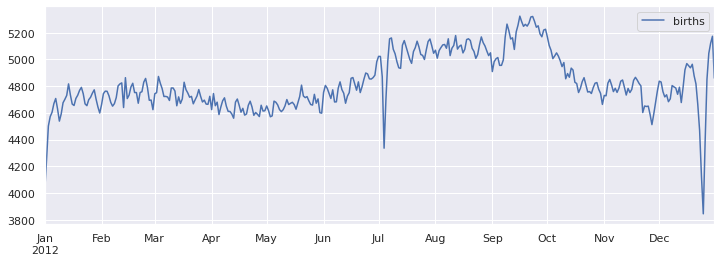

In [25]:
fig, ax = plt.subplots(figsize=(12, 4))
births_month.plot(ax=ax)
plt.show()